# Summary

PCA topics

- covariance matrix and geometry interpretation

- PCA derivation

- PCA application: denoising, low rank approximation

- SVD

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import sklearn.preprocessing
import sklearn.datasets
import seaborn as sns

# PCA

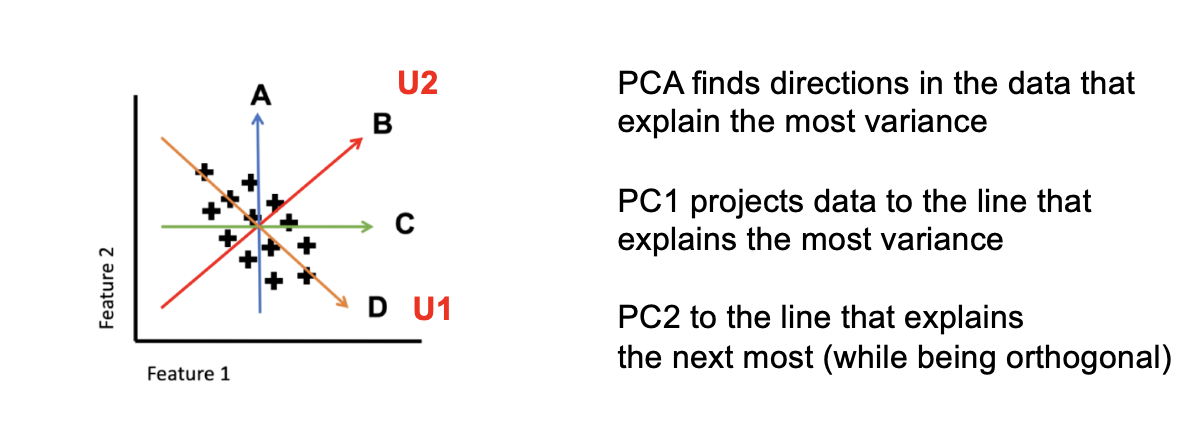

- PCA finds directions in data that explain the most variance


- PC1 projects data to the direction that explains most variance


- PC2 projects data to the direction that explains the next most variance 

    and the direction is orthogonal to PC1's direction

## how do we find these directions

- PC1: $U_1$ is eigenvector of $\Sigma$ with largest eigenvalue


- PC2: $U_2$ is eigenvector of $\Sigma$ with the second largest eigenvalue

procedures

1. compute covariance matrix $\Sigma$


2. eigendecomposition $\Sigma=USU^{-1}$


3. **loadings** are found in $U$

    $U$ is a weighted linear combination of the other feature dimensions
    
    PCA loadings: coefficients (coordinates) of the linear combination of the original features

4. new projected data are $\tilde X=XU$

## ad of PCA 

1. Loadings

    loadings give info about how original features are combined to given eigenvectors
    
    thus features that "load highly" create more spread in data
    

2. Scree Plot: eigenvectors give the amount of variance explained

## scree plot

- a scree plot is a line plot of the **eigenvalues** of factors or principal components in an analysis.


- The scree plot is used to determine the number of factors to retain in an exploratory factor analysis (FA) or principal components to keep in a principal component analysis (PCA).

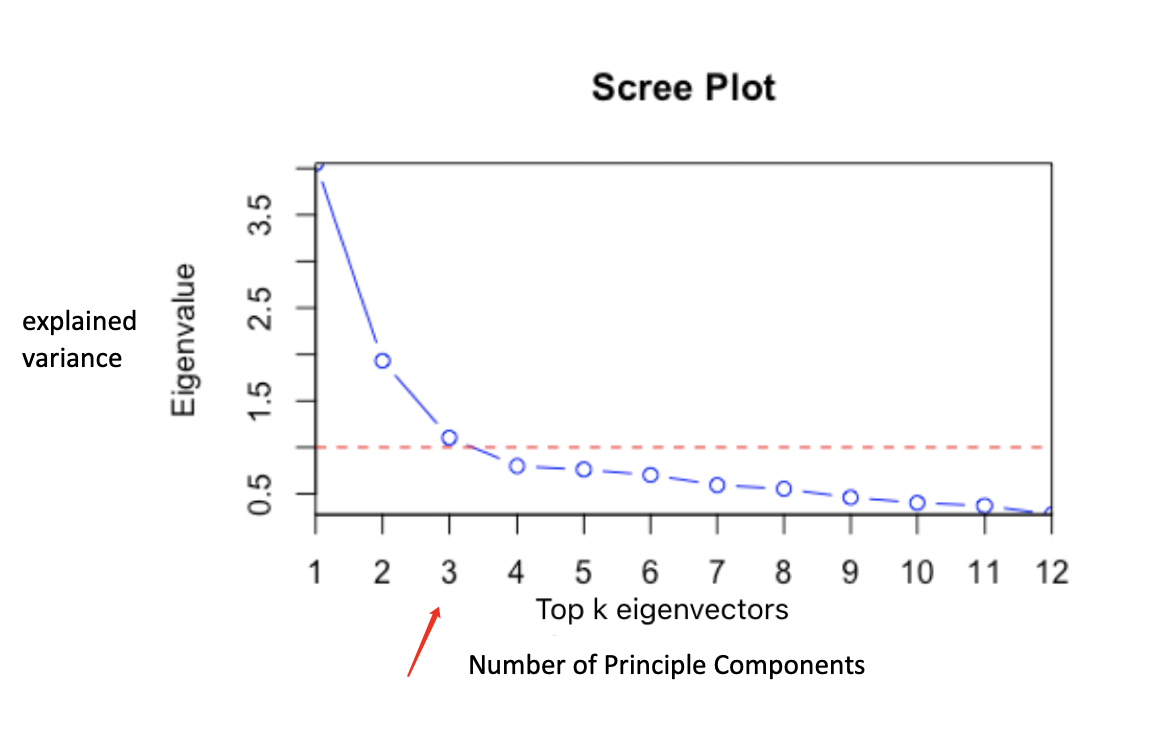

# PCA motivation

- motivation 1: find directions in data that preserve most variance


- motivation 2: pack maximal info in just a few dims:

    these dims don't have redundant info or **correlated info**
    

- these motivations are all under same assumption: the directions ("new features") are linear combination of original features 

# PCA derivation

- based on motivation 1 - we want to find directions in data that preserve most variance


- assume $v \in \mathbb{R}^p$ is a vector in feature space of X, where $p$ is sample size,
    
    we want to maximize variance of $v$,
    
    recall if $v$ is a linear combination of columns of data matrix X,
    
    then variance of $v$ can be computed as:
    
    $$
    Var(v)=v^T \Sigma v
    $$
    
    where $\Sigma$ is covariance matrix of data X
    

- but we can maximize this by increasing magnitude of v,

    so we constraint v to be a unit vector only represents direction
    
    $$
    \left \| v \right \|=v^Tv=1
    $$
    

- objective: 

$$
\hat v = \underset{v|v^Tv=1}{\arg \max} v^T \Sigma v
$$


- this objective can be solved by **Lagrange Multipliers**

## Lagrange Multipliers

- we want to maximize $f(x,y)$ under certain constraint $g(x,y)=0$


- we solve this Lagrangian function by taking derivative of L w.r.t $x,y,\lambda$

$$
L(x,y,\lambda)=f(x,y)-\lambda g(x,y)
$$

where $\lambda$ is Lagrange multiplier


- Lagrange multiplier theorem:

    any local maxima $f(x,y)$ under the equality constraints $g(x,y)=0$,
    
    the gradient of $f(x,y)$ can be expressed as a **linear combination of gradient of constraints** with multipliers $\lambda$ as coefficients
    
$$
\frac{\partial f(x,y)}{\partial x, \partial y}- \lambda \frac{\partial g(x,y)}{\partial x, \partial y}=0
$$

$$
\frac{\partial f(x,y)}{\partial x, \partial y}=\lambda \frac{\partial g(x,y)}{\partial x, \partial y}
$$

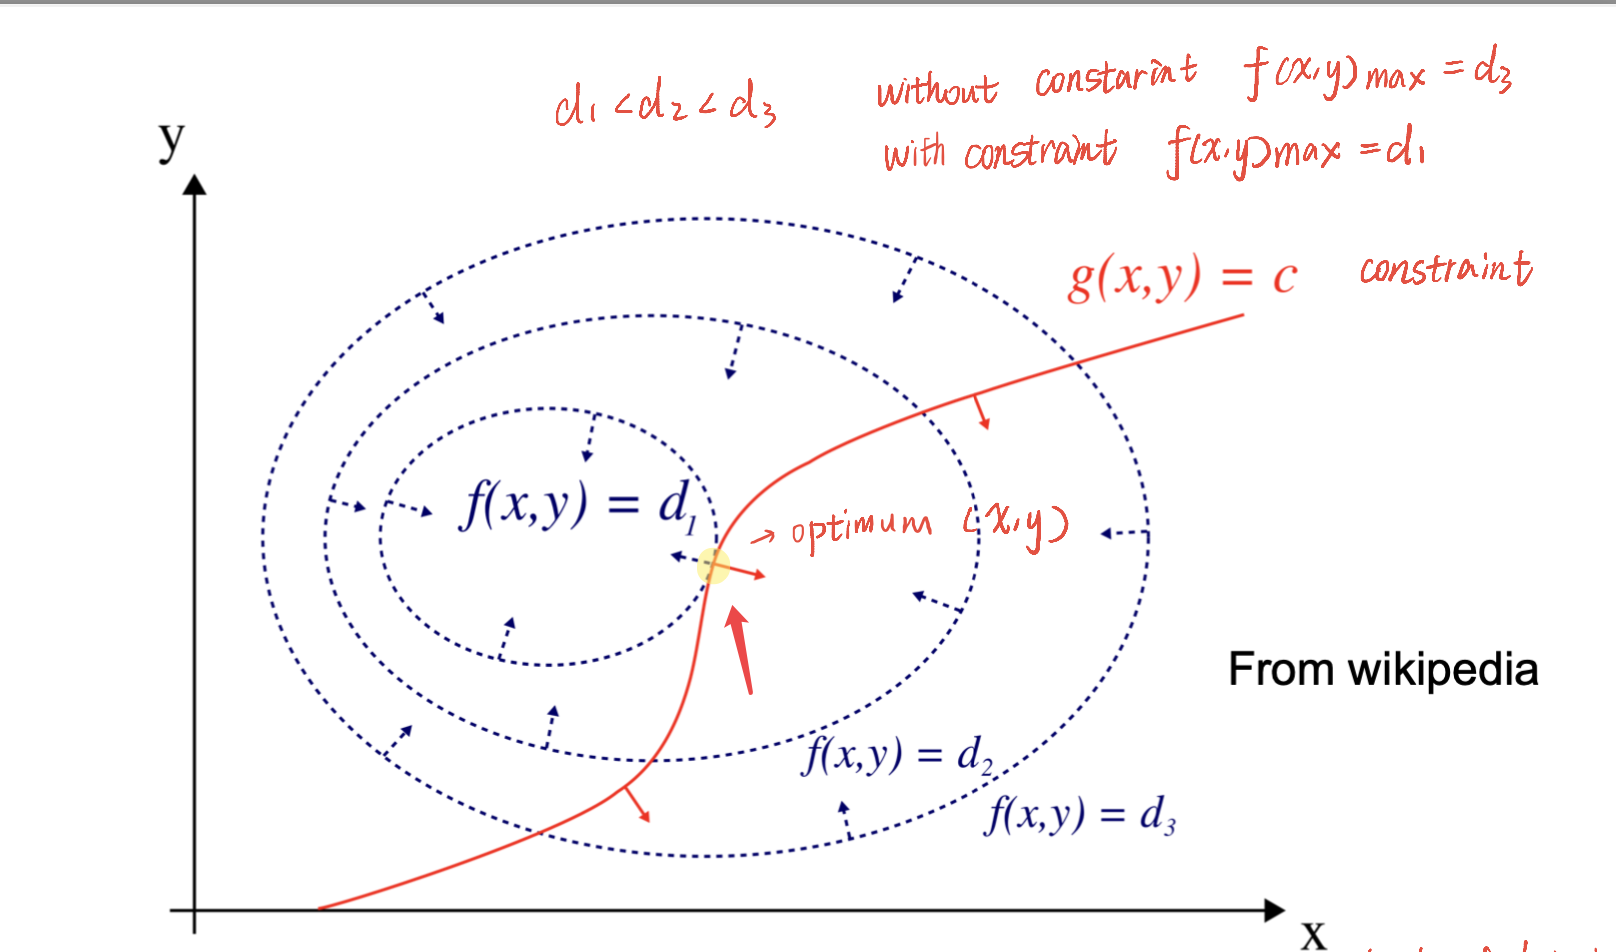

- the graph plots 3 different value $d_1 <d_2 <d_3$ of function $f(x,y)$ and constraint $g(x,y)=c$

    with constraint, f achieves its local maxima at tangent point with g,
    
    f and g are tangent with each other
    
    where gradient of constraint g and function f are **parallel** to each other and with opposite directions,
    
    so in Lagrangian function, use subtraction 

## PCA optimization using Lagrange Multipliers

- objective:

$$
\hat v = \arg \max_{v}L(v, \lambda) = \arg \max_{v} v^T\Sigma v - \lambda (v^Tv-1)
$$


- solving: take derivative of L w.r.t $v$ and set derivative to 0

$$
\frac{d}{dv} [v^T\Sigma v-\lambda(v^Tv-1)]=0
$$

$$
2\Sigma v - 2\lambda v=0
$$

$$
\Sigma v = \lambda v
$$

optimal solution $v$ is eigenvector corresponding to **largest** eigenvalue of $\Sigma$

$$
\hat v = u_1
$$

choose **largest** eigenvalue, coz we want to maximize variance of v:

$$
 v^T\Sigma v=v^T \lambda v = \lambda_1
 $$

## derive 2nd component of PCA using Lagrange multiplier 

- to obtain next direction $v_2$, we maximize same optimization, but with another constraint that is orthogonal to $u_1$


- optimal solution: $v_2$ is 2nd largest eigenvector $u_2$ of $\Sigma$

$$
v_2=u_2
$$

- recall eigenvectors are orthogonal to each other,

    this means PC components won't contain redundant info, and will be uncorrelated

- objective:

$$
\hat v_2 = \arg \max_{v_2}L(v_2, \lambda) = \arg \max_{v_2} v_2^T\Sigma v_2 - \lambda_1 (v_2^Tv_2-1) - \lambda_2 (u_1^Tv_2)
$$

here we have 2 constraints: $v_2$ is unit vector and $v_2$ is orthogonal to first PC $u_1$



- solving: take derivative of L w.r.t $v_2$ and set derivative to 0

$$
\frac{d}{d v_2} [v_2^T\Sigma v_2 - \lambda_1 (v_2^Tv_2-1) - \lambda_2 (u_1^Tv_2)]=0
$$

$$
2\Sigma v_2 - 2\lambda_1 v_2 - \lambda_2 u_1=0
$$

$$
\Sigma v_2 = \lambda_1 v_2 \ and \ \lambda_2=0
$$

then $v_2 = u_2$,

2nd largest variance $Var(u_2)=u_2^T\Sigma u_2 =u_2^T\lambda_2 u_2=\lambda_2$ 

NOTE: 1st Lagrange multiplier $\lambda_1$ is 2rd largest eigenvalue

# implement PCA

## ex4: Write the manual code for PCA

1. compute covariance matrix $\Sigma$

2. eigen decomposition $\Sigma=USU^{-1}$

3. **coordinates** are found in $U$
    
4. new projected data are $\tilde X=XU$

# PCA application

- key application of PCA is dim reduction, useful for

    - visualization in 2-3D
    
    - data compression: store a simpler form of data with fewer features
    
    - denoising: remove noises, only keep true signals, noises are often captured by unimportant features

# visualization with PCA

## motivation

- Wine dataset has 178 wines and 13 features


- if we randomly select 2 features as axis, e.g., `malic_acid` and `magnesium`

    plot them in 2D and labeled by `cultivar` (1, 2, 3)
    
    we can see the features can't separate data groupings 1,2,3 
    
    and don't fully reveal heterogeneity
    

- this motivates us to use loadings of PCA as axes to visualize data

## eigendecomposition of covariance matrix

- compute covariance matrix $\Sigma$ of data matrix X


- eigendecomposition of covariance matrix $\Sigma$

$$
\Sigma=U\Lambda U^{-1}
$$

- loadings/principal axes: columns of U, eigenvectors of $\Sigma$


- principal components of data (data projection): $\tilde X = UX$


- visualizing data in 2D via PCA: draw scatterplot using first 2 principal components of data: PC1 $\tilde X_{(:, 1)}$ VS. PC2 $\tilde X_{(:, 2)}$

### load Wine dataset

In [4]:
wine = sklearn.datasets.load_wine()

# Access the numerical data from the wine Bunch
data = wine['data']

# features: Load features of data
feature_names = wine['feature_names']

# label: Load cultivar information about each wine
cultivars = np.array(['Cultivar{}'.format(cl) for cl in wine['target']])

# Create nice names for each row
wine_names = np.array(['Wine{}'.format(i) for i in range(data.shape[0])])

# use the sklearn StandardScaler to scale to mean 0, variance 1
data = sklearn.preprocessing.StandardScaler().fit_transform(data)

# Gather all of this information into a DataFrame
data = pd.DataFrame(data, columns=feature_names, index=wine_names)

# Print the first 5 rows of the data, eq. to data[:5]
data.head()



alcohol  malic_acid       ash  alcalinity_of_ash  magnesium  \
Wine0  1.518613   -0.562250  0.232053          -1.169593   1.913905   
Wine1  0.246290   -0.499413 -0.827996          -2.490847   0.018145   
Wine2  0.196879    0.021231  1.109334          -0.268738   0.088358   
Wine3  1.691550   -0.346811  0.487926          -0.809251   0.930918   
Wine4  0.295700    0.227694  1.840403           0.451946   1.281985   

       total_phenols  flavanoids  nonflavanoid_phenols  proanthocyanins  \
Wine0       0.808997    1.034819             -0.659563         1.224884   
Wine1       0.568648    0.733629             -0.820719        -0.544721   
Wine2       0.808997    1.215533             -0.498407         2.135968   
Wine3       2.491446    1.466525             -0.981875         1.032155   
Wine4       0.808997    0.663351              0.226796         0.401404   

       color_intensity       hue  od280/od315_of_diluted_wines   proline  
Wine0         0.251717  0.362177                      1.847920  1.013009  
Wine1        -0.293321  0.406051                      1.113449  0.965242  
Wine2         0.269020  0.318304                      0.788587  1.395148  
Wine3         1.186068 -0.427544                      1.184071  2.334574  
Wine4        -0.319276  0.362177                      0.449601 -0.037874

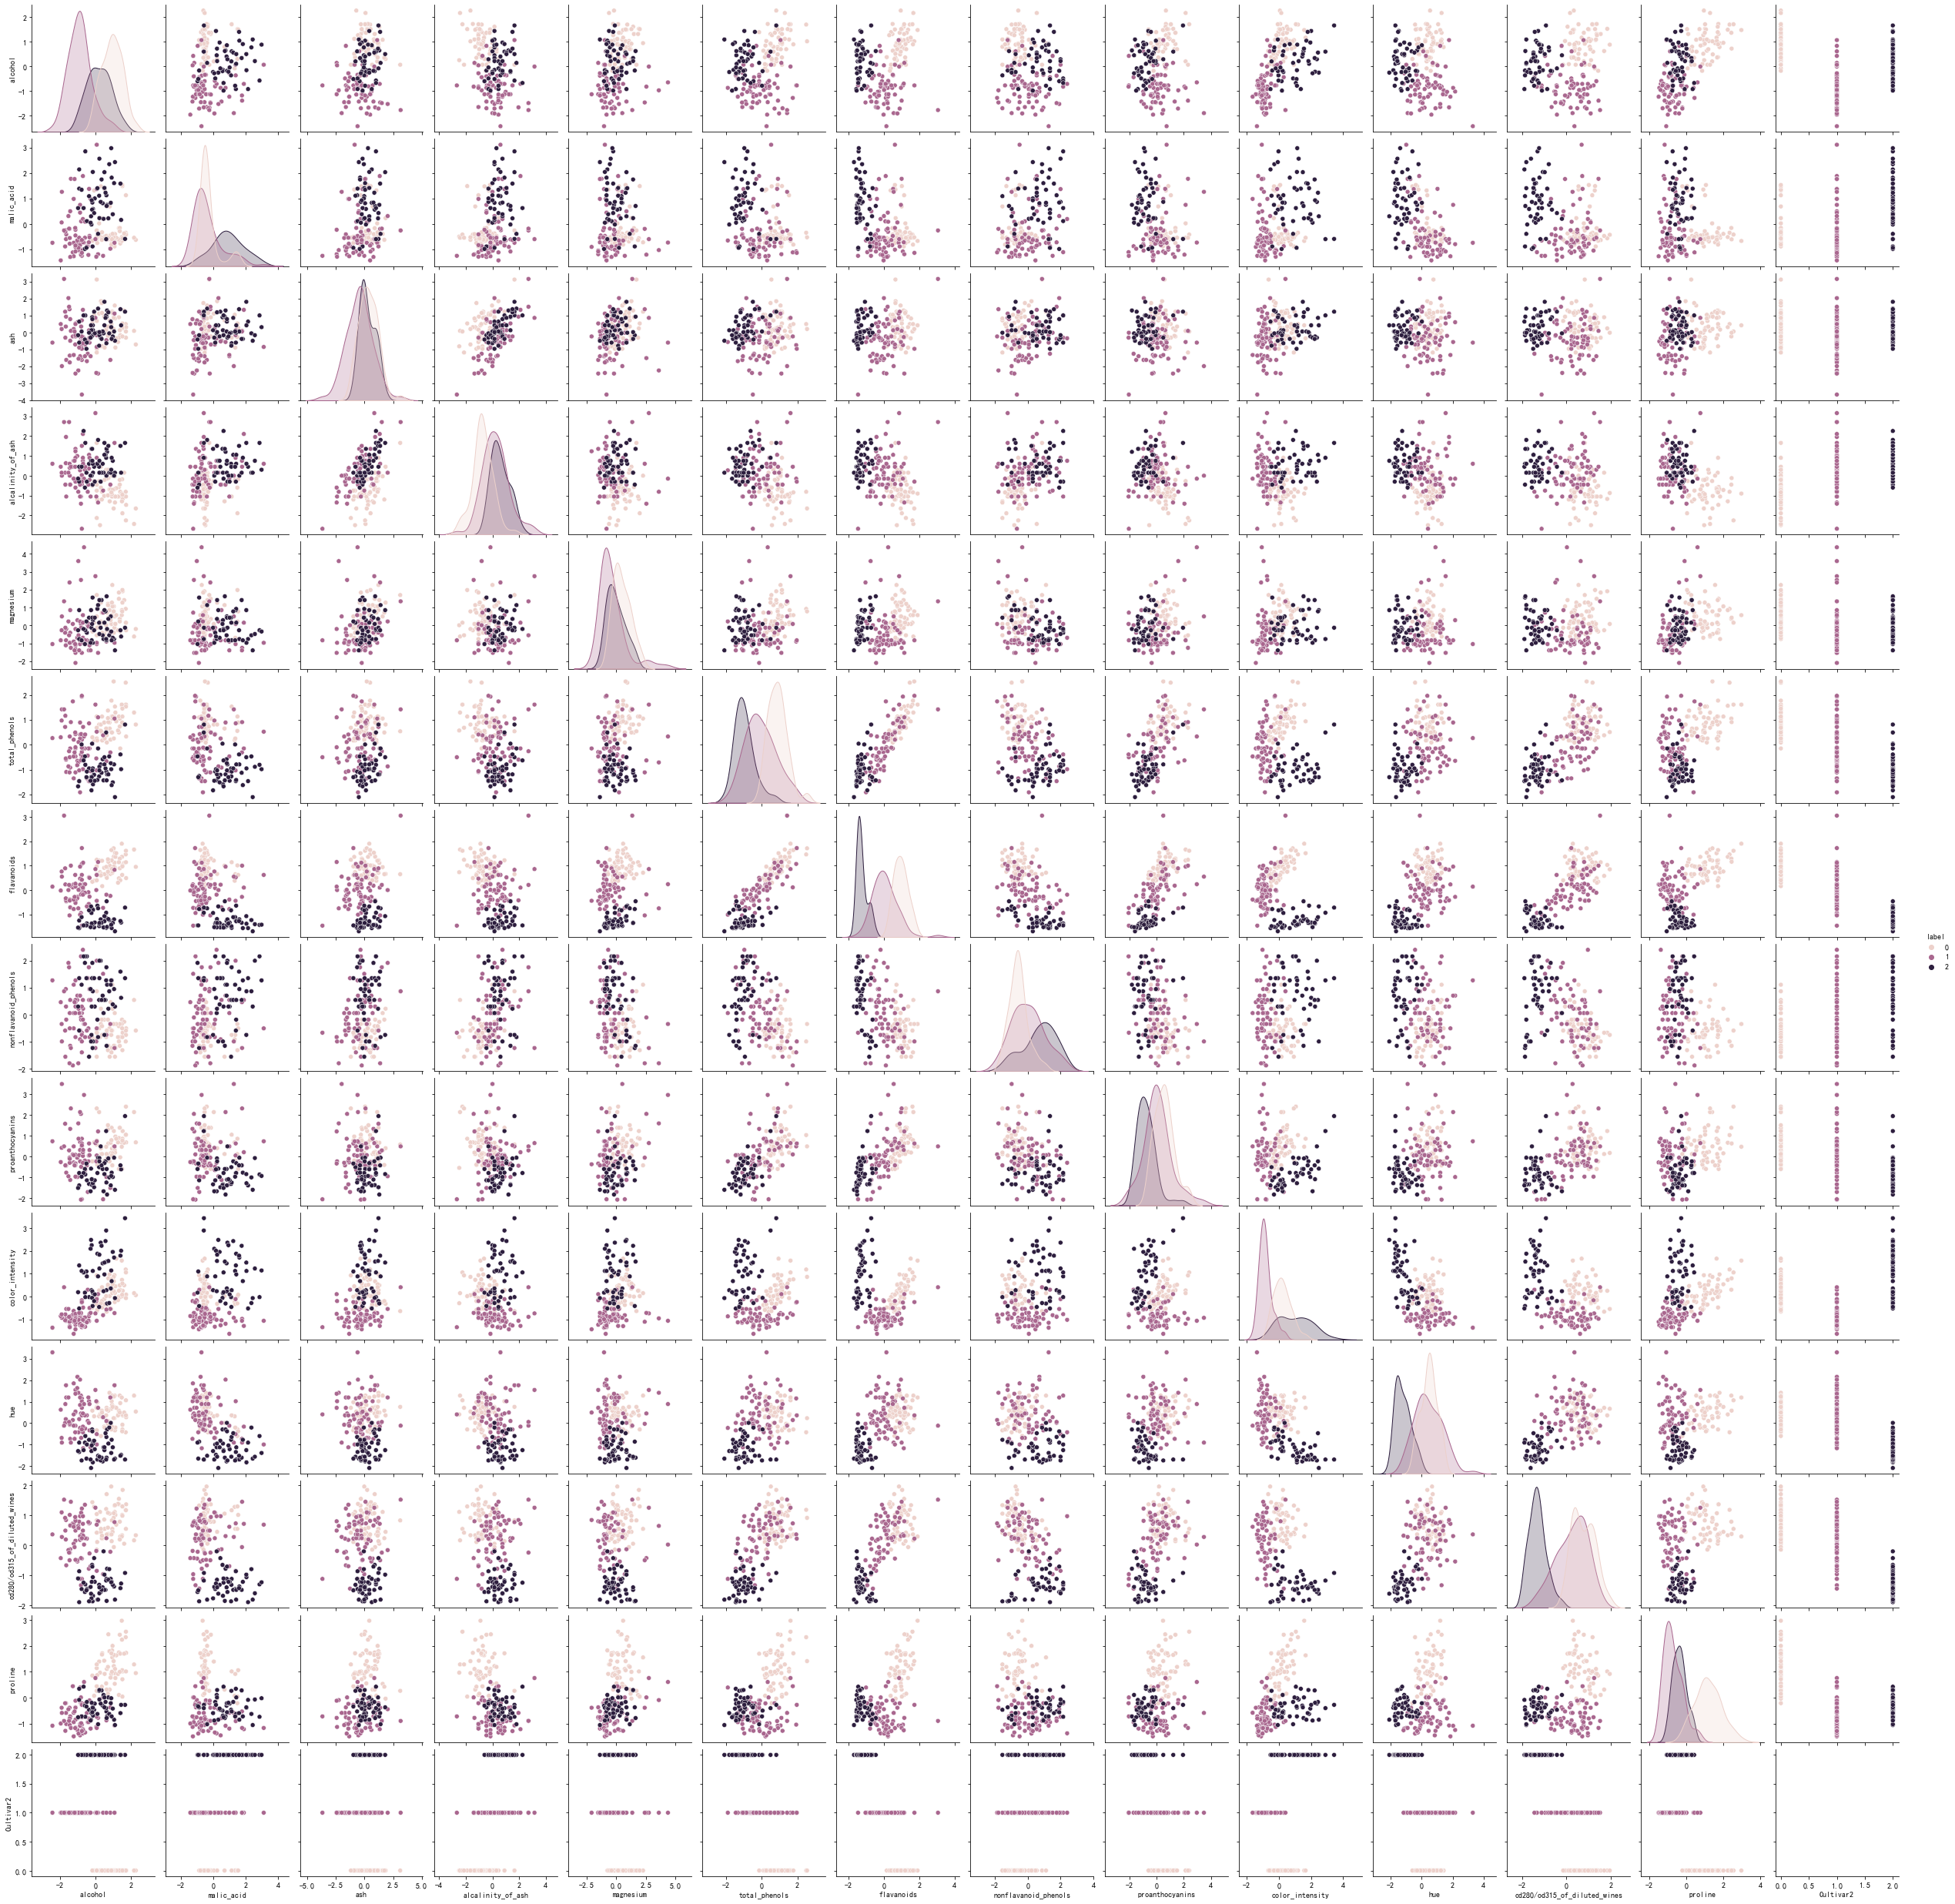

In [11]:

# convert categorical labels to integer labels (0, 1, 2)
labels, data['label'] = np.unique(cultivars, return_inverse=True)
sns.pairplot(data, hue='label')

- feature 'flavanoids' contributes most in PC1 while feature 'color_intensity' contributes most in PC2

    These two features can seperate data into 3 clusters though the contour of clusters isn't so clear as PCA result

- PC1 separate wines well while PC2 doesn't

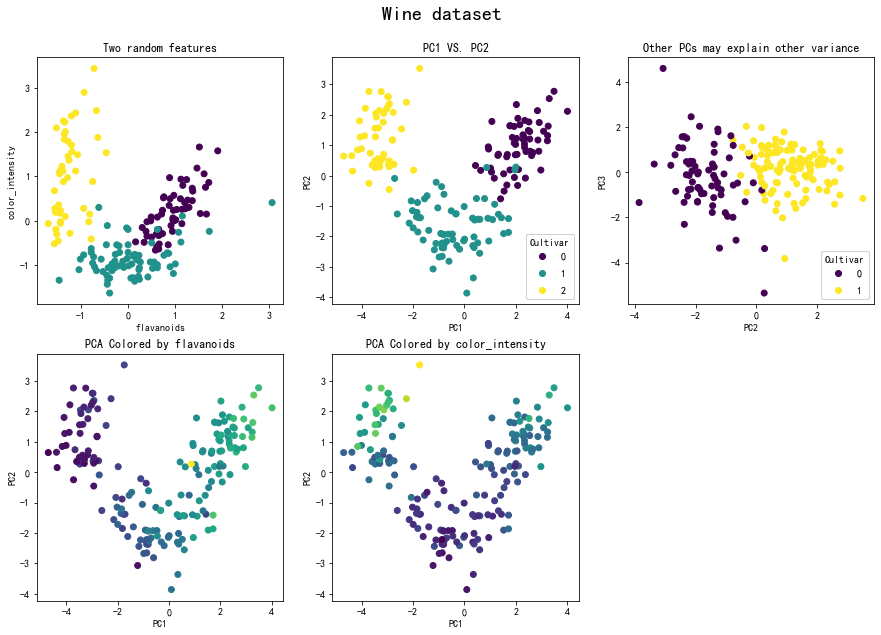

In [126]:
# convert categorical labels to integer labels (0, 1, 2)
labels, data['label'] = np.unique(cultivars, return_inverse=True)
data['label2'] = np.where(data['label']==1, 0, 1)
features = ['flavanoids', 'color_intensity']

X = data.iloc[:, :-1].to_numpy().T # convert dataframe to numpy array and take transpose of data to work for PCA
cov = X @ X.T/(X.shape[1] - 1) # compute covariance matrix of data
# eigendecomposition of covariance matrix
eigenvalues, U = np.linalg.eig(cov) # eigenvalues=(13,), U=(13, 13) U contains 13 eigenvectors/loadings of PCA
tilde_X = U.T @ X # principal components of data (data projection) (13, 178)

fig, ax = plt.subplots(2,3, figsize=(15, 10))
ax[0][0].scatter(data[features[0]], data[features[1]], c=data['label'])
ax[0][0].set(xlabel = features[0], ylabel = features[1], title="Two random features")
scatter = ax[0][1].scatter(tilde_X.T[:,0], tilde_X.T[:,1], c=data['label'])
ax[0][1].set(xlabel = "PC1", ylabel = "PC2", title="PC1 VS. PC2")
legend = ax[0][1].legend(*scatter.legend_elements(), loc="lower right", title="Cultivar")
ax[0][1].add_artist(legend)

for i, feature in enumerate(features):
    ax[1][i].scatter(tilde_X.T[:,0], tilde_X.T[:,1], c=data[features[i]])
    ax[1][i].set(xlabel = "PC1", ylabel = "PC2", title=f"PCA Colored by {features[i]}")

scatter = ax[0][2].scatter(tilde_X.T[:,1], tilde_X.T[:,2], c=data['label2'])
ax[0][2].set(xlabel = "PC2", ylabel = "PC3", title="Other PCs may explain other variance")
legend = ax[0][2].legend(*scatter.legend_elements(), loc="lower right", title="Cultivar")
ax[0][2].add_artist(legend)

ax[1][2].axis('off')

fig.suptitle("Wine dataset", fontsize=20, y=0.95)
plt.show() 

## loadings explain PCs

In [ ]:
             _   PC1 PC2 ... PCp   _
alcohol      |   |    |       |    |
malic_acid   |   |    |  ...  |    |
ash          |  u1    u2 ...  up   |
...
proline      |_  |    |       |   _|

- loadings are contained in orthonormal matrix $U \in \mathbb{R}^{p \times p}$, p is feature size

    where rows are features (alcohol, malic_acid, ash,...), 
    
    columns are new axis PC1, PC2,..., PCp, i.e., eigenvector of covariance matrix $\Sigma$
    

- any PC $\in \mathbb{R}^{p}$ is a linear combination of features,

    e.g. PC1 = -0.15 alcohol + 0.25 malic_acid + 0.001 ash + ... 0.2 proline

    the larger tha absolute value of weight, the greater the feature contributes to this principle axes


In [ ]:
PCi = U[:,i] # loading i

array([-0.1443294 ,  0.24518758,  0.00205106,  0.23932041, -0.14199204,
       -0.39466085, -0.4229343 ,  0.2985331 , -0.31342949,  0.0886167 ,
       -0.29671456, -0.37616741, -0.28675223])

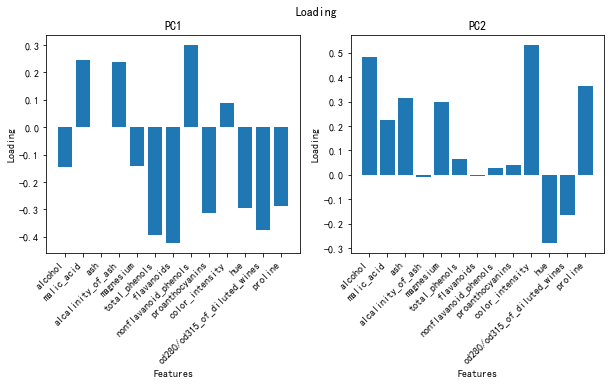

In [87]:
fig, ax = plt.subplots(1, 2, figsize=(10, 4))
titles=['PC1', 'PC2']
for i, title in enumerate(titles):
    ax[i].bar(feature_names, U[:,i])
    ax[i].set(xlabel = "Features", ylabel = "Loading", title=title)
    plt.setp(ax[i].get_xticklabels(), rotation=45, ha='right')

fig.suptitle("Loading")
plt.show()

## Scree Plot

- explained variance

$$
\text{Explained variance}=Var(u) = \lambda_k = \frac{\sigma_k^2}{n-1}
$$

where $u$ is kth eigenvector of covariance matrix $\Sigma$ of data, $\lambda_k$ is kth eigenvalue,

$\sigma_k$ is kth singular value of data matrix $X$, $n$ is sample size 

- derivation:

    suppose $u$ is a principal direction of unit length ($u^T u=1$)
    
    recall we calculate eigenvalue by Rayleign quotient
    
    $$
    \lambda = \frac{u^T \Sigma u}{u^T u} = u^T \Sigma u = Var(u)
    $$
    
    explained variance of eigenvector $u$ is $Var(u)$ equal to corresponding eigenvalue

[ True  True  True  True  True  True  True  True  True  True  True  True]


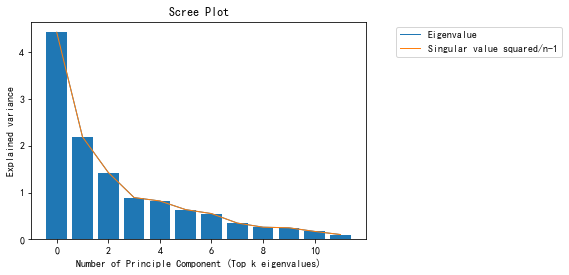

In [10]:
X = data.iloc[:, :-1].to_numpy().T # convert dataframe to numpy array and take transpose of data to work for PCA
cov = X @ X.T/(X.shape[1] - 1) # compute covariance matrix of data
eigenvalues, U = np.linalg.eigh(cov) # eigendecomposition of covariance matrix 
# eigenvalues=(13,), U=(13, 13) U contains 13 eigenvectors/loadings of PCA
u, s, vt = np.linalg.svd(X, full_matrices=False) # SVD of data matrix
eigenvalues2 = s**2/(X.shape[1]-1)
print(np.isclose(eigenvalues[::-1], eigenvalues2))

plt.bar(range(len(eigenvalues)), eigenvalues[::-1])
plt.plot(eigenvalues[::-1], linewidth=1, label='Eigenvalue')  
plt.plot(eigenvalues2, linewidth=1, label='Singular value squared/n-1')

plt.xlabel("Number of Principle Component (Top k eigenvalues)")
plt.ylabel("Explained variance")
plt.legend(bbox_to_anchor=(1.6, 1))
plt.title("Scree Plot")
plt.show()

- from Scree Plot, we can see intrinsic dim of data is 3 

    coz there are 3 significant eigenvalues

# SVD  (singular value decomposition) 

## def

- SVD is a generalization of eigendecomposition to **non-square matrix**, any real matrix has a SVD

- since our dataset is often a non-square matrix,

    so we can directly apply SVD to our dataset without computing covariance matrix

- A is our dataset, SVD of A is decompose a matrix into a multiplication of 3 matrices: 

    an orthonormal matrix U, a diagonal matrix S, and another orthonormal matrix V

$$
A = USV^T
$$


- apply matrix $A$ to some data $X$ is equivalent to first apply a rotation matrix $V^T$ to $X$, then apply a scaling matrix $S$, finally apply another rotation matrix $U$

$$
AX = (USV^T)X = US(V^TX) = U(SV^TX)
$$

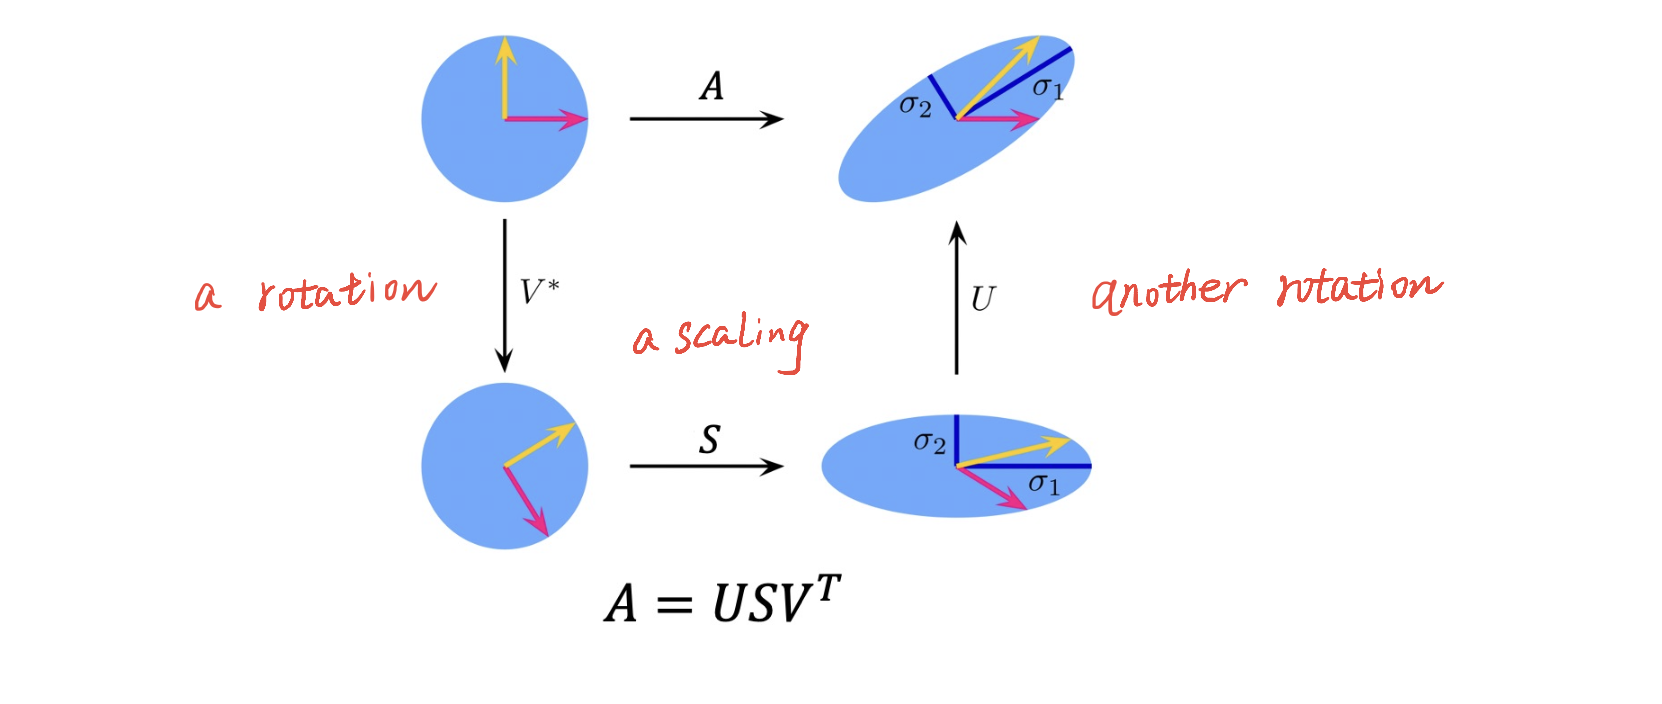

- properties of orthonormal matrix $U$:

    - row or column vectors are all orthonormal: they are orthogonal and have length of unit 1
    
    - since $U^T=U^{-1}$, thus $UU^T=U^TU=I$

## connections of SVD with ED and PCA


### eigendecomposition

- for any matrix $A \in \mathbb{R}^{n \times p}$, there are 3 facts:

    - left singular vectors of A are eigenvectors of $AA^T \in \mathbb{R}^{n \times n}$
    
    - right singular vectors of A are eigenvectors of $A^TA \in \mathbb{R}^{p \times p}$
    
    - squares of singular values of $A$ are eigenvalues of $A^TA$

- Proof:

    SVD of A: 
    
    $$A=USV^T$$
    
    eigendecomposition of $AA^T$:
    
    $$
    AA^T=(USV^T)(USV^T)^T=(USV^T)(VSU^T)=US(V^TV)SU^T=USI_nSU^T=US^2U^T=US^2U^{-1}
    $$
    
    eigendecomposition of $A^TA$:
    
    $$
    A^TA=(USV^T)^T(USV^T)=(VSU^T)(USV^T)=VS(U^TU)SV^T=VSI_nSV^T=VS^2V^T=VS^2V^{-1}
    $$
    
    eigenvalues of $A^TA$ are diagonal entries of diagonal matrix $S^2$: $\lambda_i = \sigma^2_i$
    
$$
S^2=\begin{bmatrix}
\sigma_1^2 &  &  & \\ 
 & \sigma_2^2 &  & \\ 
 &  & \ddots  & \\ 
 &  &  & \sigma_n^2
\end{bmatrix}
$$

### PCA

- a preferred method to compute PCA is via SVD rather than eigendecomposition


- for data matrix $X \in \mathbb{R}^{n \times p}$, by convention, we **first flip the matrix** to be $X^T  \in \mathbb{R}^{p \times n}$, then do SVD of $X^T$:

$$
X^T = USV^T
$$

- principal axis (loadings) are columns of V


- principal components (projected data) are $US$

$$
\tilde X = X^T V = (USV^T)V=US (V^TV)=USI_n=US
$$


- Note: if we don't flip the data matrix,

    - loadings are columns of U

    - principal components (projected data) are $SV^T$

$$
\tilde X = U^TX = U^T(USV^T)=(U^TU)SV^T=I_nSV^T=SV^T
$$

- proof:

    for data matrix $X \in \mathbb{R}^{n \times p}$, n is sample size, p is number of features,
    
    we first flip matrix to be $X^T \in \mathbb{R}^{p \times n}$, suppose $X^T$ is mean-centered, covariance matrix of $X^T$ is

$$
Cov(X^T)=\frac{XX^T}{n-1}
$$

- n is just a scaler we can drop it, the eigendecomposition of covariance matrix of $X^T$ reduced to eigendecomposition of $XX^T$


- according to 1st fact that left singular vectors of A are eigenvectors of $AA^T$
    
    here we flip X so, right singular vectors of $X$ are eigenvectors of $XX^T$, which are in matrix V

# low rank approximation with SVD

reconstruct data in rank k space

$$
X_k = U_k \hat \alpha = U_k (U_k^T X)
$$

- low rank approximation = data compression

- we can store data with fewer features but still have confident to recreate data with some degree of accuracy

- Scree Plot (explained variance vs. principal component) suggests that we can recreate data using fewer features, often 2 or 3

- e.g., for matrix M with 4 features, we can drop one feature (last column of U) to recreate M

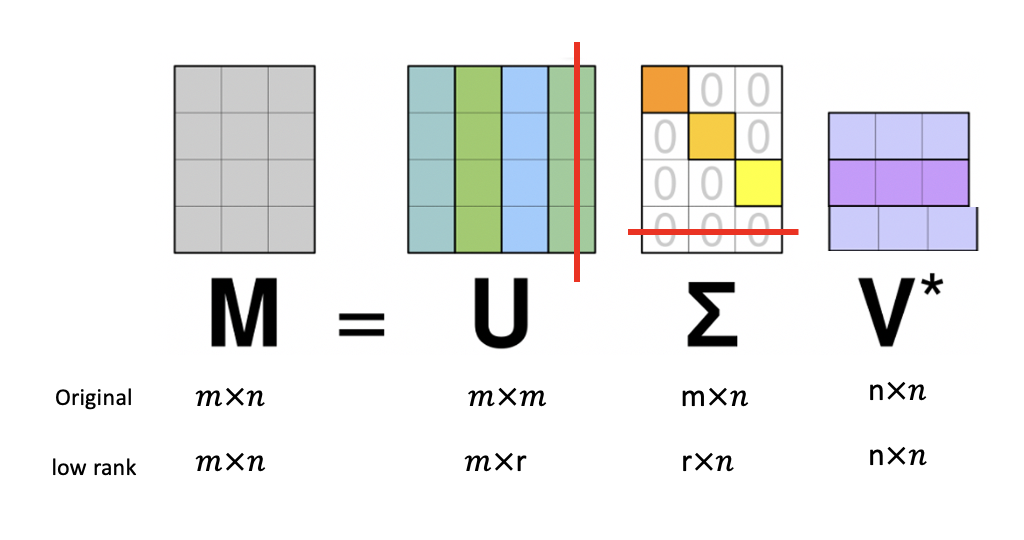

## Denosing with SVD

- denoising is an application of low rank matrix decomposition


- in SVD, we reorder "features" from explain most variance (capture signal) to least variance (capture noise)

    if we remove useless "features", we can keep signals while remove noises
- low rank matrix decomposition naturally keeps smooth signals,

    and take off jumpy/"high freq" signals that don't explain much variation

## e.g., Einstein image dataset

- Einstein image is a dataset with 1070 x 942 features (pixels)

- view rows of an image as samples, columns of an image as features


- we can recreate the image using fewer features

    - 40 features: small degradation
    
    - 10 features: blurred but can still recognized the person as Einstein

Text(0.5, 0.98, 'Low rank approximation and denoising')

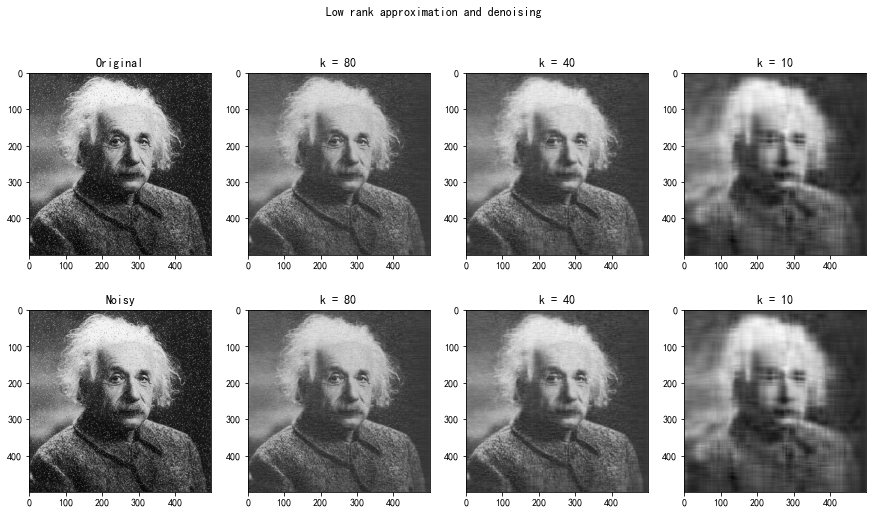

In [160]:
# from PIL import Image
# from skimage.util import random_noise
# X = np.asarray(Image.open("/Users/wenxinxu/Desktop/CPSC553/data/einstein.png"))
# noisyX = random_noise(X, mode='s&p', salt_vs_pepper=0.75)

# U1, s, VT = np.linalg.svd(X.T, full_matrices=False) # SVD of data matrix X
# U2, s, VT = np.linalg.svd(X.T, full_matrices=False) # SVD of noisy data matrix X

fig, axs = plt.subplots(2, 4, figsize=(15, 8))

for i, (U, X) in enumerate(zip([U1, U2], [X, noisyX])):
    for j, k in enumerate([500, 80, 40, 10]):
        axs[i][j].imshow((U[:,:k] @ (U[:,:k].T @ X.T)).T, cmap='gray')
        if i == 0 and j == 0:
            axs[i][j].set_title(f"Original")
        elif i == 1 and j == 0:
            axs[i][j].set_title(f"Noisy")
        else:
            axs[i][j].set_title(f"k = {k}")

fig.suptitle("Low rank approximation and denoising")